## Constraints:
### Number of Parameters = <20k
### Number of epochs = 20
### Accuracy = 99.4 %

In [8]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary
from torchsummary import summary
from tqdm import tqdm

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv11 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)     #input-28 Output-28 RF-1
        self.batch11 = nn.BatchNorm2d(8)
        self.conv12 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
        self.batch12 = nn.BatchNorm2d(8)
        self.conv13 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=1)
        self.batch13 = nn.BatchNorm2d(16)
        self.pool14 = nn.MaxPool2d(2, 2)                                                      #input-28 Output-14 RF-

        self.conv21 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)    #input-14 Output-14 RF-
        self.batch21 = nn.BatchNorm2d(16)
        self.conv22 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
        self.batch22 = nn.BatchNorm2d(16)
        self.conv23 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=1)
        self.batch23 = nn.BatchNorm2d(32)
        self.pool24 = nn.MaxPool2d(2, 2)                                                      #input-14 Output-07 RF-

        self.conv31 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)    #input-07 Output-07 RF-
        self.batch31 = nn.BatchNorm2d(32)
        self.conv32 = nn.Conv2d(in_channels=32, out_channels=10, kernel_size=3, padding=1)
        self.batch32 = nn.BatchNorm2d(10)
        # self.conv33 = nn.Conv2d(in_channels=10, out_channels=10, kernel_size=7)


    def forward(self, x):
        x = F.relu(self.batch11(self.conv11(x)))
        x = F.relu(self.batch12(self.conv12(x)))
        x = F.relu(self.batch13(self.conv13(x)))
        x = self.pool14(x)

        # print(x.shape)

        x = F.relu(self.batch21(self.conv21(x)))
        x = F.relu(self.batch22(self.conv22(x)))
        x = F.relu(self.batch23(self.conv23(x)))
        x = self.pool24(x)

        # print(x.shape)

        x = F.relu(self.batch31(self.conv31(x)))
        x = F.relu(self.batch32(self.conv32(x)))
        # x = self.conv33(x)
        x = F.adaptive_avg_pool2d(x, (1,1))

        # print(x.shape)
        x = torch.flatten(x, 1)
        # x = x.view(-1, 10)

        return x

current_model = Net()
dummy_data = torch.randn(5, 1, 28, 28)
dummy_output = current_model(dummy_data)
print(dummy_output.shape)


'''
self.conv11 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)     #input-28 Output-28 RF-1
self.batch11 = nn.BatchNorm2d(32)
self.conv12 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
self.batch12 = nn.BatchNorm2d(32)
self.conv13 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=1)
self.batch13 = nn.BatchNorm2d(32)
self.pool14 = nn.MaxPool2d(2, 2)                                                      #input-28 Output-14 RF-

self.conv21 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)    #input-14 Output-14 RF-
self.batch21 = nn.BatchNorm2d(16)
self.conv22 = nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, padding=1)
self.batch22 = nn.BatchNorm2d(8)
self.conv23 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=1)
self.batch23 = nn.BatchNorm2d(8)
self.pool24 = nn.MaxPool2d(2, 2)                                                      #input-14 Output-07 RF-

self.conv31 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)    #input-07 Output-07 RF-
self.batch31 = nn.BatchNorm2d(8)
self.conv32 = nn.Conv2d(in_channels=8, out_channels=10, kernel_size=3, padding=1)
self.batch32 = nn.BatchNorm2d(10)
# self.conv33 = nn.Conv2d(in_channels=10, out_channels=10, kernel_size=7)
'''

torch.Size([5, 10])


'\nself.conv11 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)     #input-28 Output-28 RF-1\nself.batch11 = nn.BatchNorm2d(32)\nself.conv12 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)\nself.batch12 = nn.BatchNorm2d(32)\nself.conv13 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=1)\nself.batch13 = nn.BatchNorm2d(32)\nself.pool14 = nn.MaxPool2d(2, 2)                                                      #input-28 Output-14 RF-\n\nself.conv21 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)    #input-14 Output-14 RF-\nself.batch21 = nn.BatchNorm2d(16)\nself.conv22 = nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, padding=1)\nself.batch22 = nn.BatchNorm2d(8)\nself.conv23 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=1)\nself.batch23 = nn.BatchNorm2d(8)\nself.pool24 = nn.MaxPool2d(2, 2)                                                      #input-14 Output-07 RF-\n\nself.conv31 = nn.Conv2d(in_ch

In [11]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
       BatchNorm2d-2            [-1, 8, 28, 28]              16
            Conv2d-3            [-1, 8, 28, 28]             584
       BatchNorm2d-4            [-1, 8, 28, 28]              16
            Conv2d-5           [-1, 16, 28, 28]             144
       BatchNorm2d-6           [-1, 16, 28, 28]              32
         MaxPool2d-7           [-1, 16, 14, 14]               0
            Conv2d-8           [-1, 16, 14, 14]           2,320
       BatchNorm2d-9           [-1, 16, 14, 14]              32
           Conv2d-10           [-1, 16, 14, 14]           2,320
      BatchNorm2d-11           [-1, 16, 14, 14]              32
           Conv2d-12           [-1, 32, 14, 14]             544
      BatchNorm2d-13           [-1, 32, 14, 14]              64
        MaxPool2d-14             [-1, 3

In [12]:
# # torch.manual_seed(1)
# batch_size = 128

# kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
# train_loader = torch.utils.data.DataLoader(
#     datasets.MNIST('../data', train=True, download=True,
#                     transform=transforms.Compose([
#                         transforms.ToTensor(),
#                         transforms.Normalize((0.1307,), (0.3081,))
#                     ])),
#     batch_size=batch_size, shuffle=True, **kwargs)


# test_loader = torch.utils.data.DataLoader(
#     datasets.MNIST('../data', train=False, transform=transforms.Compose([
#                         transforms.ToTensor(),
#                         transforms.Normalize((0.1307,), (0.3081,))
#                     ])),
#     batch_size=batch_size, shuffle=True, **kwargs)

# Transforms (use same norm for both)
mnist_mean, mnist_std = (0.1307,), (0.3081,)
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(4)], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize(mnist_mean, mnist_std),
])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mnist_mean, mnist_std),
])

train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data  = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

batch_size = 128  # smaller gives faster feedback; increase if you want
train_kwargs = {'batch_size': batch_size, 'shuffle': True,  'num_workers': 2, 'pin_memory': True if use_cuda else False}
test_kwargs  = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True if use_cuda else False}

train_loader = torch.utils.data.DataLoader(train_data, **train_kwargs)
test_loader  = torch.utils.data.DataLoader(test_data,  **test_kwargs)

tensor(7)
tensor(2)


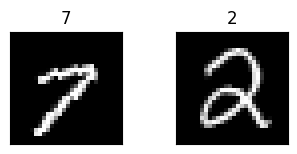

In [14]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(2):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  print(batch_label[i])
  plt.xticks([])
  plt.yticks([])

In [19]:
criterion = nn.CrossEntropyLoss()
train_loss_data = []
test_loss_data = []
test_accuracy = []

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')

        train_loss_data.append(loss.item())


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_loss_data.append(test_loss)
    test_accuracy.append(100. * correct / len(test_loader.dataset))

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [20]:
model = Net().to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

loss=0.6293884515762329 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.06it/s]



Test set: Average loss: 0.3380, Accuracy: 9615/10000 (96.15%)



loss=0.3740464746952057 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.52it/s]



Test set: Average loss: 0.1907, Accuracy: 9819/10000 (98.19%)



loss=0.3982640504837036 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 23.29it/s]



Test set: Average loss: 0.1515, Accuracy: 9789/10000 (97.89%)



loss=0.2409404069185257 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.29it/s]



Test set: Average loss: 0.1237, Accuracy: 9811/10000 (98.11%)



loss=0.26603636145591736 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.71it/s]



Test set: Average loss: 0.1329, Accuracy: 9761/10000 (97.61%)



loss=0.19770300388336182 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.74it/s]



Test set: Average loss: 0.1599, Accuracy: 9569/10000 (95.69%)



loss=0.1745494157075882 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.76it/s]



Test set: Average loss: 0.0664, Accuracy: 9876/10000 (98.76%)



loss=0.17985160648822784 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.90it/s]



Test set: Average loss: 0.0568, Accuracy: 9891/10000 (98.91%)



loss=0.20514069497585297 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.75it/s]



Test set: Average loss: 0.0644, Accuracy: 9877/10000 (98.77%)



loss=0.16039717197418213 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.72it/s]



Test set: Average loss: 0.0444, Accuracy: 9911/10000 (99.11%)



In [24]:
for epoch in range(10):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

loss=0.20325958728790283 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.03it/s]



Test set: Average loss: 0.0486, Accuracy: 9881/10000 (98.81%)



loss=0.21183057129383087 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.92it/s]



Test set: Average loss: 0.0363, Accuracy: 9926/10000 (99.26%)



loss=0.1679750233888626 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.86it/s]



Test set: Average loss: 0.0365, Accuracy: 9919/10000 (99.19%)



loss=0.13064561784267426 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.41it/s]



Test set: Average loss: 0.0346, Accuracy: 9928/10000 (99.28%)



loss=0.19982023537158966 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.86it/s]



Test set: Average loss: 0.0344, Accuracy: 9917/10000 (99.17%)



loss=0.18568702042102814 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.72it/s]



Test set: Average loss: 0.0329, Accuracy: 9924/10000 (99.24%)



loss=0.1564144641160965 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.97it/s]



Test set: Average loss: 0.0299, Accuracy: 9932/10000 (99.32%)



loss=0.08834487944841385 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 23.02it/s]



Test set: Average loss: 0.0244, Accuracy: 9942/10000 (99.42%)



loss=0.11302875727415085 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.55it/s]



Test set: Average loss: 0.0322, Accuracy: 9912/10000 (99.12%)



loss=0.1384602040052414 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.69it/s]



Test set: Average loss: 0.0310, Accuracy: 9924/10000 (99.24%)



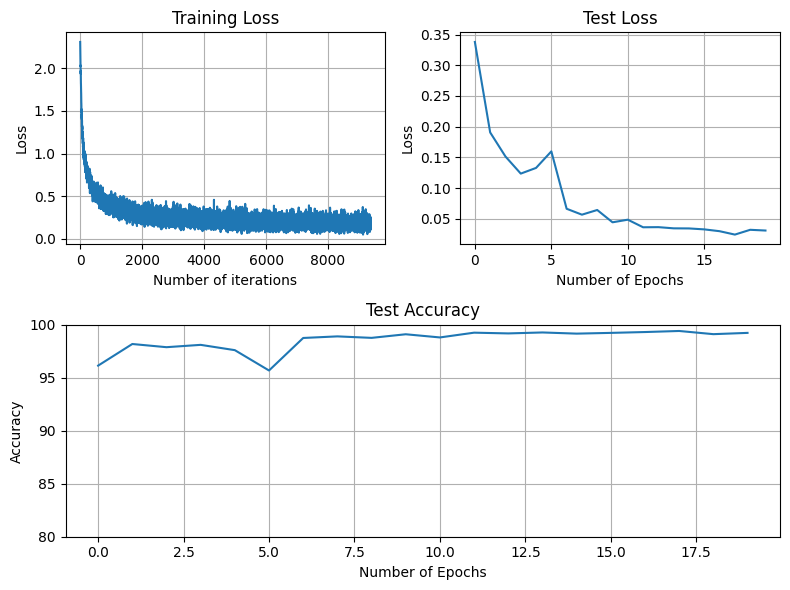

In [25]:
import matplotlib.pyplot as plt

# Create subplots: 2 rows, first row has 2 columns, second row has 1 column
fig = plt.figure(figsize=(8, 6))

# First row: 2 subplots
ax1 = plt.subplot(2, 2, 1)  # Training Loss
ax1.plot(train_loss_data)
ax1.set_title("Training Loss")
ax1.set_xlabel("Number of iterations")
ax1.set_ylabel("Loss")
ax1.grid(which='both')

ax2 = plt.subplot(2, 2, 2)  # Test Loss
ax2.plot(test_loss_data)
ax2.set_title("Test Loss")
ax2.set_xlabel("Number of Epochs")
ax2.set_ylabel("Loss")
ax2.grid(which='both')

# Second row: 1 merged subplot
ax3 = plt.subplot(2, 1, 2)  # Test Accuracy (spans full width of bottom row)
ax3.plot(test_accuracy)
ax3.set_title("Test Accuracy")
ax3.set_xlabel("Number of Epochs")
ax3.set_ylabel("Accuracy")
ax3.set_ylim(80, 100)
ax3.grid(which='both')

plt.tight_layout()
plt.show()